In [55]:
# for data retrieval
import mlcroissant as mlc

# for data manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

# for data report
from ydata_profiling import ProfileReport

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Data Overview
- description of dataset
- overview of the sample size
- info about the data

In [56]:
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/atharvasoundankar/fashion-retail-sales/croissant/download')
metadata = croissant_dataset.metadata.to_json()

  -  [Metadata(🛍️ Fashion Retail Sales Dataset)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


In [57]:
print(f"{metadata['name']}: {metadata['description']}")

🛍️ Fashion Retail Sales Dataset: ## 📜 Dataset Overview  
This dataset contains **3,400** records of fashion retail sales, capturing various details about customer purchases, including item details, purchase amounts, ratings, and payment methods. It is useful for analyzing customer buying behavior, product popularity, and payment preferences.  

## 📂 Dataset Details  

| Column Name               | Data Type | Non-Null Count | Description |
|---------------------------|----------|---------------|-------------|
| `Customer Reference ID`   | Integer  | 3,400         | A unique identifier for each customer. |
| `Item Purchased`          | String   | 3,400         | The name of the fashion item purchased. |
| `Purchase Amount (USD)`   | Float    | 2,750         | The purchase price of the item in USD (650 missing values). |
| `Date Purchase`           | String   | 3,400         | The date on which the purchase was made (format: DD-MM-YYYY). |
| `Review Rating`           | Float    | 3,076  

In [58]:
# retrieves data from croissant as dataframe
record_sets = croissant_dataset.metadata.record_sets
df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))

# overview of sample size
df.head()

Fashion_Retail_Sales.csv/Customer+Reference+ID  \
0                                        b'4018'   
1                                        b'4115'   
2                                        b'4019'   
3                                        b'4097'   
4                                        b'3997'   

  Fashion_Retail_Sales.csv/Item+Purchased  \
0                              b'Handbag'   
1                                b'Tunic'   
2                             b'Tank Top'   
3                             b'Leggings'   
4                               b'Wallet'   

   Fashion_Retail_Sales.csv/Purchase+Amount+(USD)  \
0                                          4619.0   
1                                          2456.0   
2                                          2102.0   
3                                          3126.0   
4                                          3003.0   

  Fashion_Retail_Sales.csv/Date+Purchase  \
0                          b'05-02-2023'   
1                          b'11-07-2023'   
2                          b'23-03-2023'   
3                          b'15-03-2023'   
4                          b'27-11-2022'   

   Fashion_Retail_Sales.csv/Review+Rating  \
0                                     NaN   
1                                     2.0   
2                                     4.1   
3                                     3.2   
4                                     4.7   

  Fashion_Retail_Sales.csv/Payment+Method  
0                          b'Credit Card'  
1                          b'Credit Card'  
2                                 b'Cash'  
3                                 b'Cash'  
4                                 b'Cash'

In [59]:
# basic info about the df
print(f'[shape of df]: {df.shape}')
print('\n')
print(f'[types of data in df]: \n{df.dtypes}')

[shape of df]: (3400, 6)


[types of data in df]: 
Fashion_Retail_Sales.csv/Customer+Reference+ID     object
Fashion_Retail_Sales.csv/Item+Purchased            object
Fashion_Retail_Sales.csv/Purchase+Amount+(USD)    float64
Fashion_Retail_Sales.csv/Date+Purchase             object
Fashion_Retail_Sales.csv/Review+Rating            float64
Fashion_Retail_Sales.csv/Payment+Method            object
dtype: object


In [60]:
# checking for duplicates and missing values
df[df[df.duplicated()]]

Fashion_Retail_Sales.csv/Customer+Reference+ID  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   
...                                             ...   
3395                                            NaN   
3396                                            NaN   
3397                                            NaN   
3398                                            NaN   
3399                                            NaN   

     Fashion_Retail_Sales.csv/Item+Purchased  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
...                                      ...   
3395                                     NaN   
3396                                     NaN   
3397                                     NaN   
3398                                     NaN   
3399                                     NaN   

      Fashion_Retail_Sales.csv/Purchase+Amount+(USD)  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
...                                              ...   
3395                                             NaN   
3396                                             NaN   
3397                                             NaN   
3398                                             NaN   
3399                                             NaN   

     Fashion_Retail_Sales.csv/Date+Purchase  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
3395                                    NaN   
3396                                    NaN   
3397                                    NaN   
3398                                    NaN   
3399                                    NaN   

      Fashion_Retail_Sales.csv/Review+Rating  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
...                                      ...   
3395                                     NaN   
3396                                     NaN   
3397                                     NaN   
3398                                     NaN   
3399                                     NaN   

     Fashion_Retail_Sales.csv/Payment+Method  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN  
...                                      ...  
3395                                     NaN  
3396                                     NaN  
3397                                     NaN  
3398                                     NaN  
3399                                     NaN  

[3400 rows x 6 columns]

In [61]:
# missing values per 
df.isna().sum()

Fashion_Retail_Sales.csv/Customer+Reference+ID      0
Fashion_Retail_Sales.csv/Item+Purchased             0
Fashion_Retail_Sales.csv/Purchase+Amount+(USD)    650
Fashion_Retail_Sales.csv/Date+Purchase              0
Fashion_Retail_Sales.csv/Review+Rating            324
Fashion_Retail_Sales.csv/Payment+Method             0
dtype: int64

#### Data Pre-Cleanup
- fix column names
- fix types and dates
- identify category and numerical columns

In [62]:
cat_cols = ['CustomerId', 'ItemPurchased', 'PaymentMethod']
num_cols = ['PurchaseAmount', 'DatePurchase', 'ReviewRating']

In [63]:
# change column name to make it more readable
df.rename(columns={
    'Fashion_Retail_Sales.csv/Customer+Reference+ID': 'CustomerId',
    'Fashion_Retail_Sales.csv/Item+Purchased': 'ItemPurchased',
    'Fashion_Retail_Sales.csv/Purchase+Amount+(USD)': 'PurchaseAmount',
    'Fashion_Retail_Sales.csv/Date+Purchase': 'DatePurchase',
    'Fashion_Retail_Sales.csv/Review+Rating': 'ReviewRating',
    'Fashion_Retail_Sales.csv/Payment+Method': 'PaymentMethod'
}, inplace=True)
df.dtypes

CustomerId         object
ItemPurchased      object
PurchaseAmount    float64
DatePurchase       object
ReviewRating      float64
PaymentMethod      object
dtype: object

In [64]:
# clean the datatypes of columns
for col in cat_cols:
    df[col] = df[col].astype(str)

col_date = 'DatePurchase'
df[col_date] = df[col_date].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
df[col_date] = pd.to_datetime(df[col_date], format="%d-%m-%Y")

df.head()

CustomerId ItemPurchased  PurchaseAmount DatePurchase  ReviewRating  \
0       4018       Handbag          4619.0   2023-02-05           NaN   
1       4115         Tunic          2456.0   2023-07-11           2.0   
2       4019      Tank Top          2102.0   2023-03-23           4.1   
3       4097      Leggings          3126.0   2023-03-15           3.2   
4       3997        Wallet          3003.0   2022-11-27           4.7   

  PaymentMethod  
0   Credit Card  
1   Credit Card  
2          Cash  
3          Cash  
4          Cash

#### Data Analysis
- basic overview of data distribution
- report from ydata profiling
- ❗ bullet points from analysis

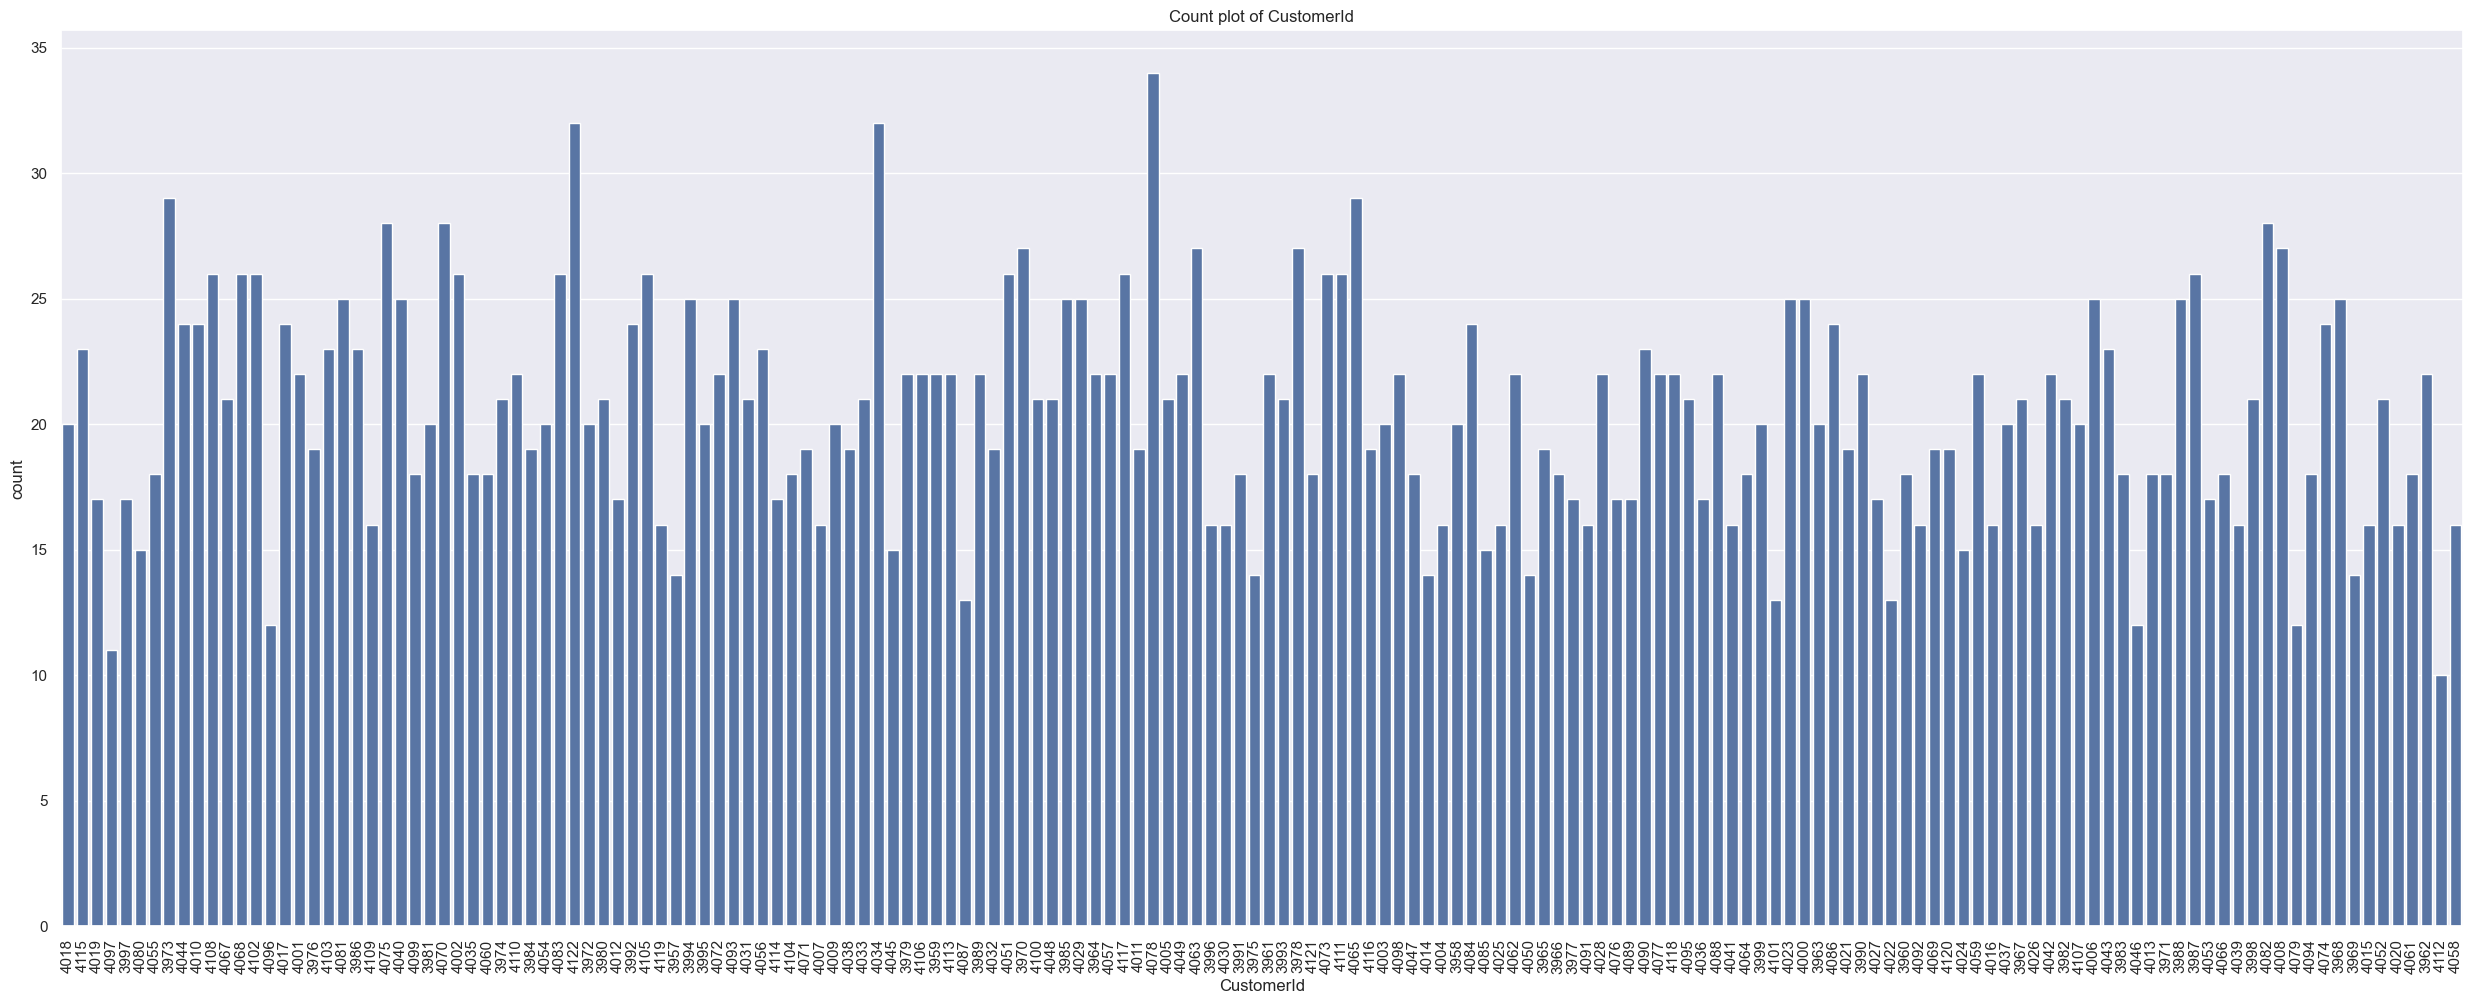

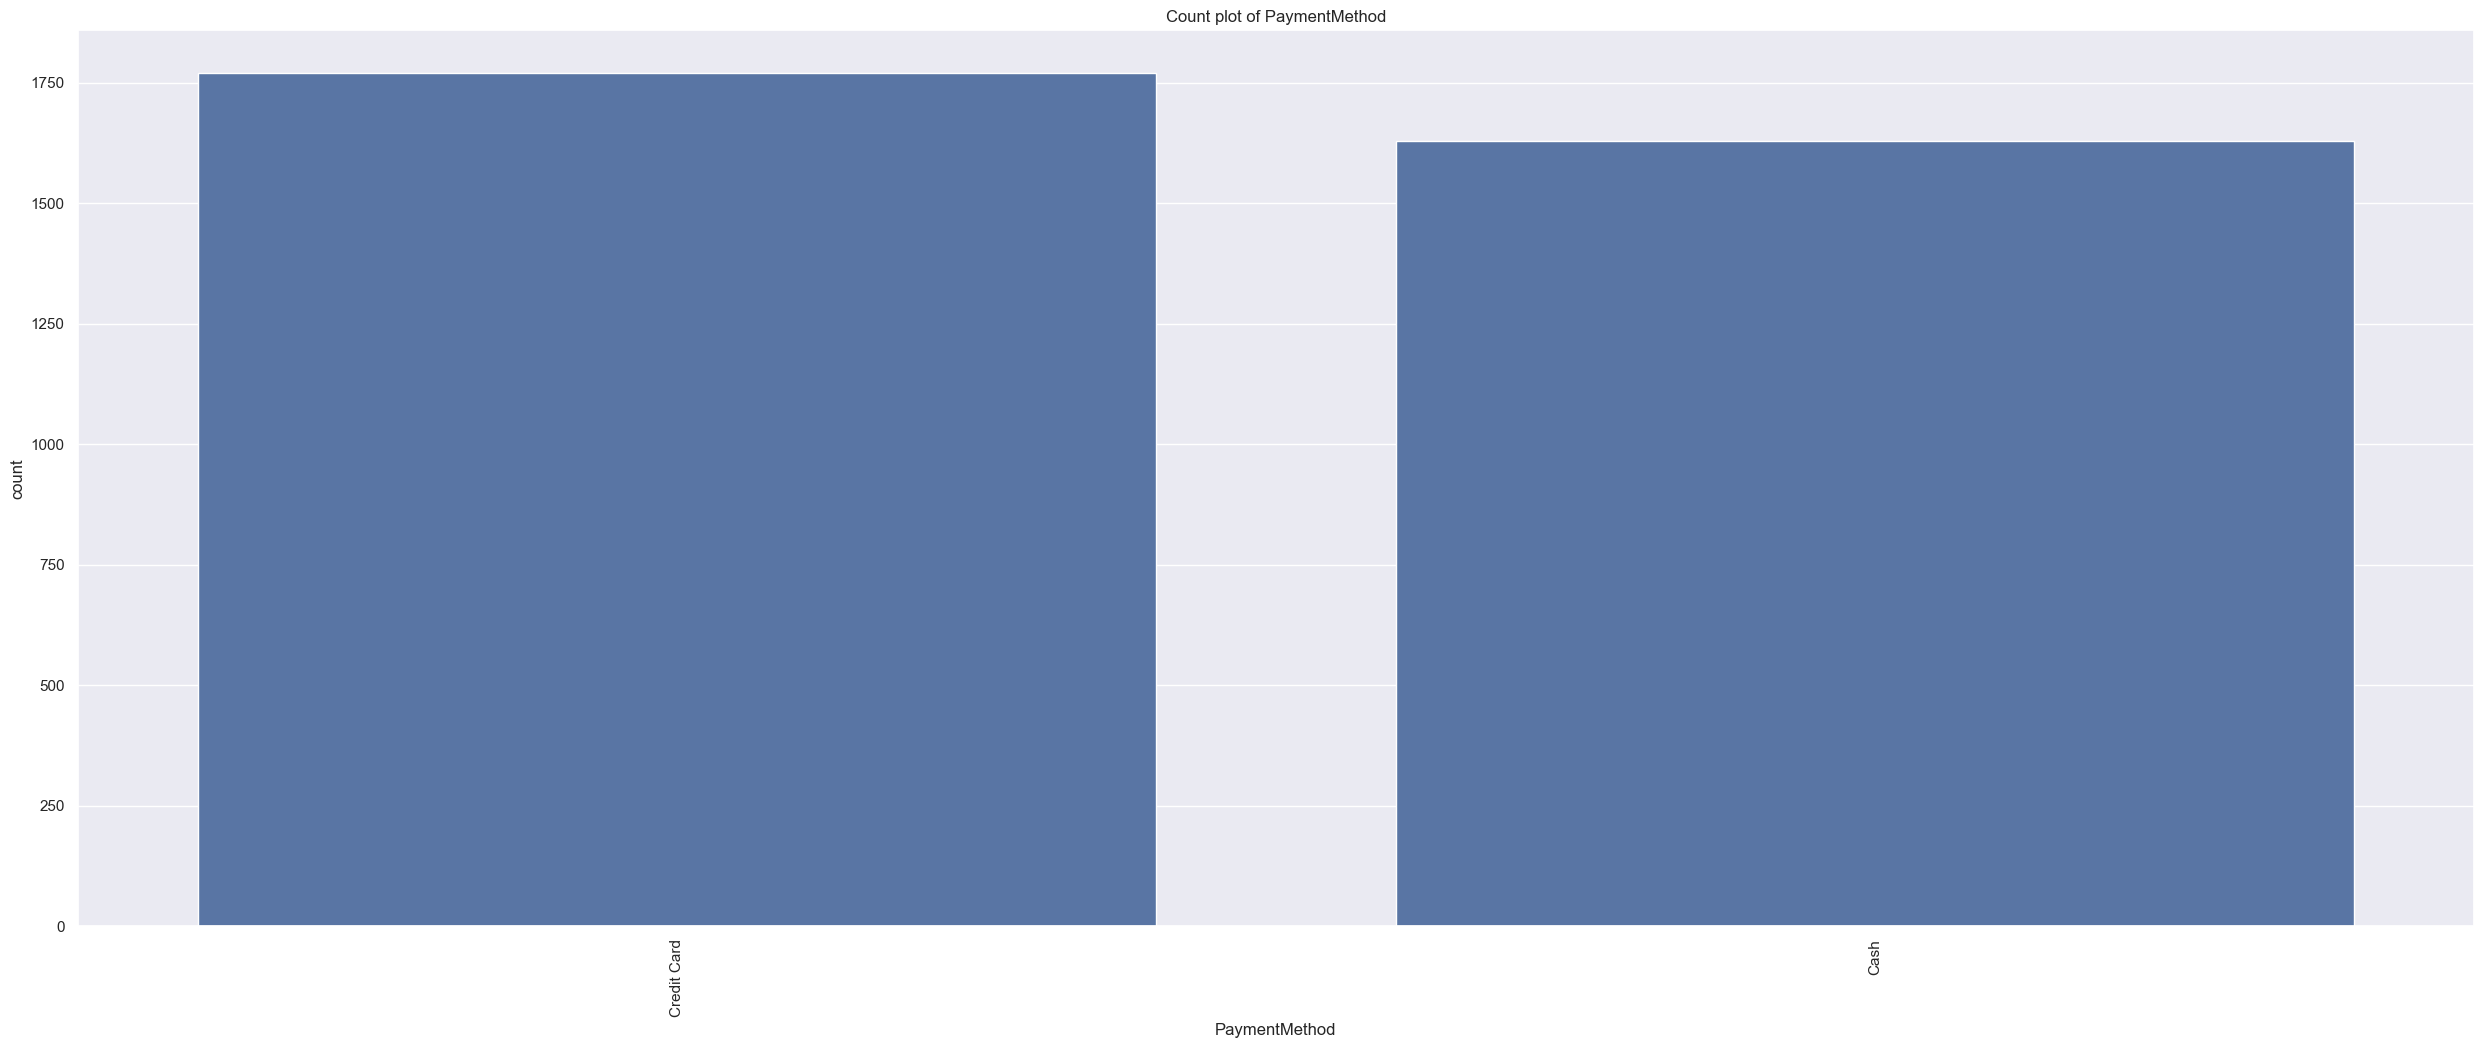

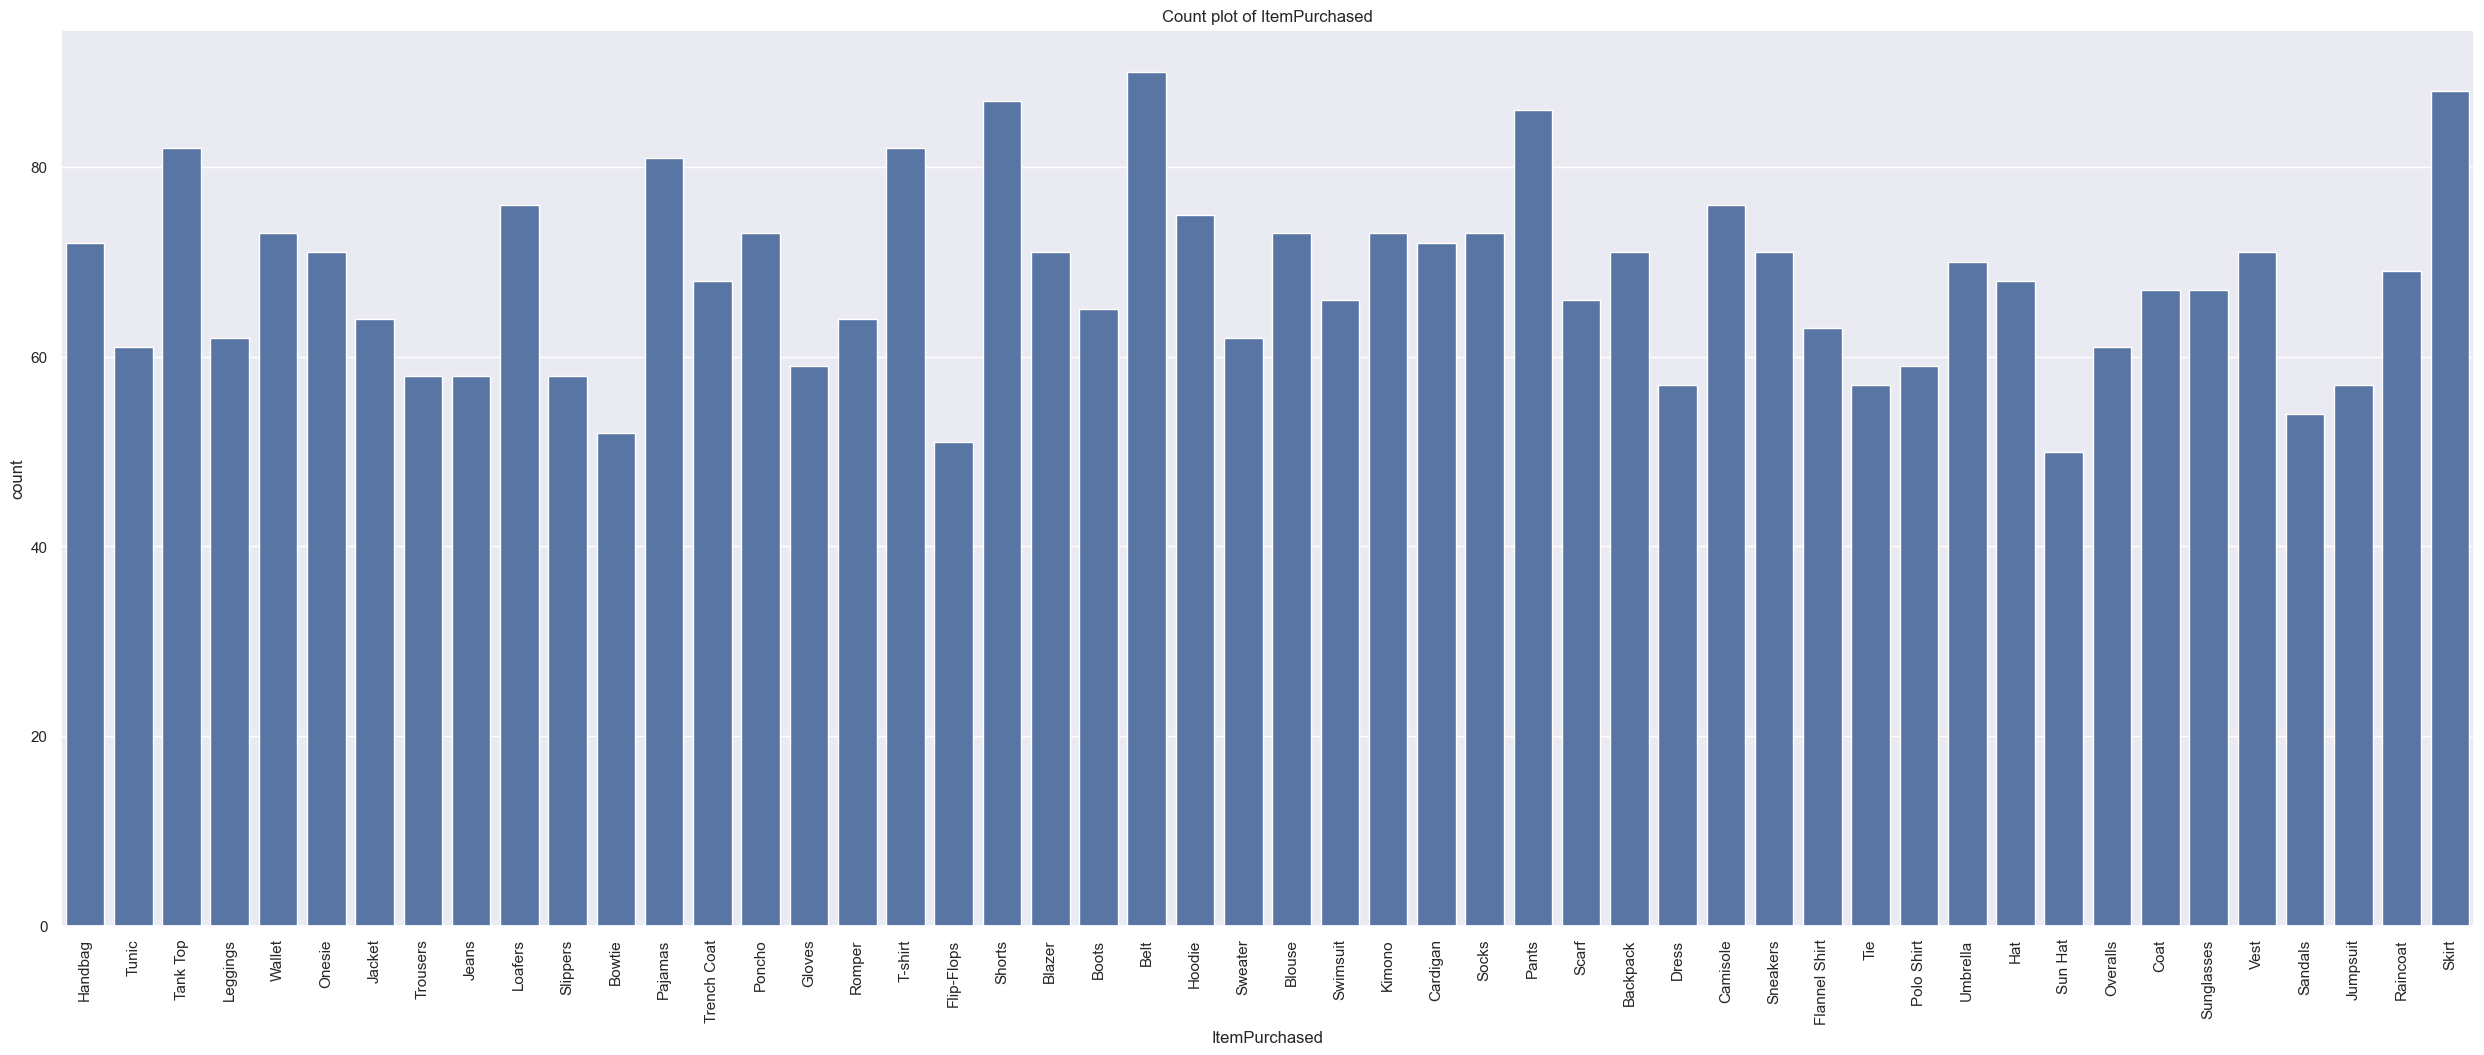

In [65]:
# show distribution of customer id
cols_for_count = ['CustomerId', 'PaymentMethod', 'ItemPurchased']

sns.set_theme()
for feature in cols_for_count:
    if feature in df.columns:
        plt.figure(figsize=(25,10))
        sns.countplot(x=feature, data=df)
        plt.title(f'Count plot of {feature}')
        plt.xlabel(feature)
        plt.ylabel('count')
        plt.tight_layout()
        plt.xticks(rotation=90)
        plt.show()

In [66]:
# Create profile for base dataset
profile = ProfileReport(
    df, 
    title='Fashion Retail Sales Profile',
    type_schema={
        'CustomerId': 'categorical'
    }
)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 737.72it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Keynotes**:
- 9.5% missing values for `ReviewRating`
- 19.1% missing values for `PurchaseAmount`
- Historgram of `PurchaseAmount` is heavily skewed
- 95th percentile of `PurchaseAmount` is around 194, with maximum 4kish
  - median is around 110 though
- 95th percentile of `ReviewRating` is around 4.8, with maximum 5
  - median is 3
- There is a slight positive correlation on `ReviewRating` with `ItemPurchased` and `PurchaseAmount`
- slight colleration of nullity between `ReviewRating` and `PurchaseAmount`
  - insight: could be due to invalid transactions as rating comes after a successful transaction

<Figure size 1500x500 with 0 Axes>

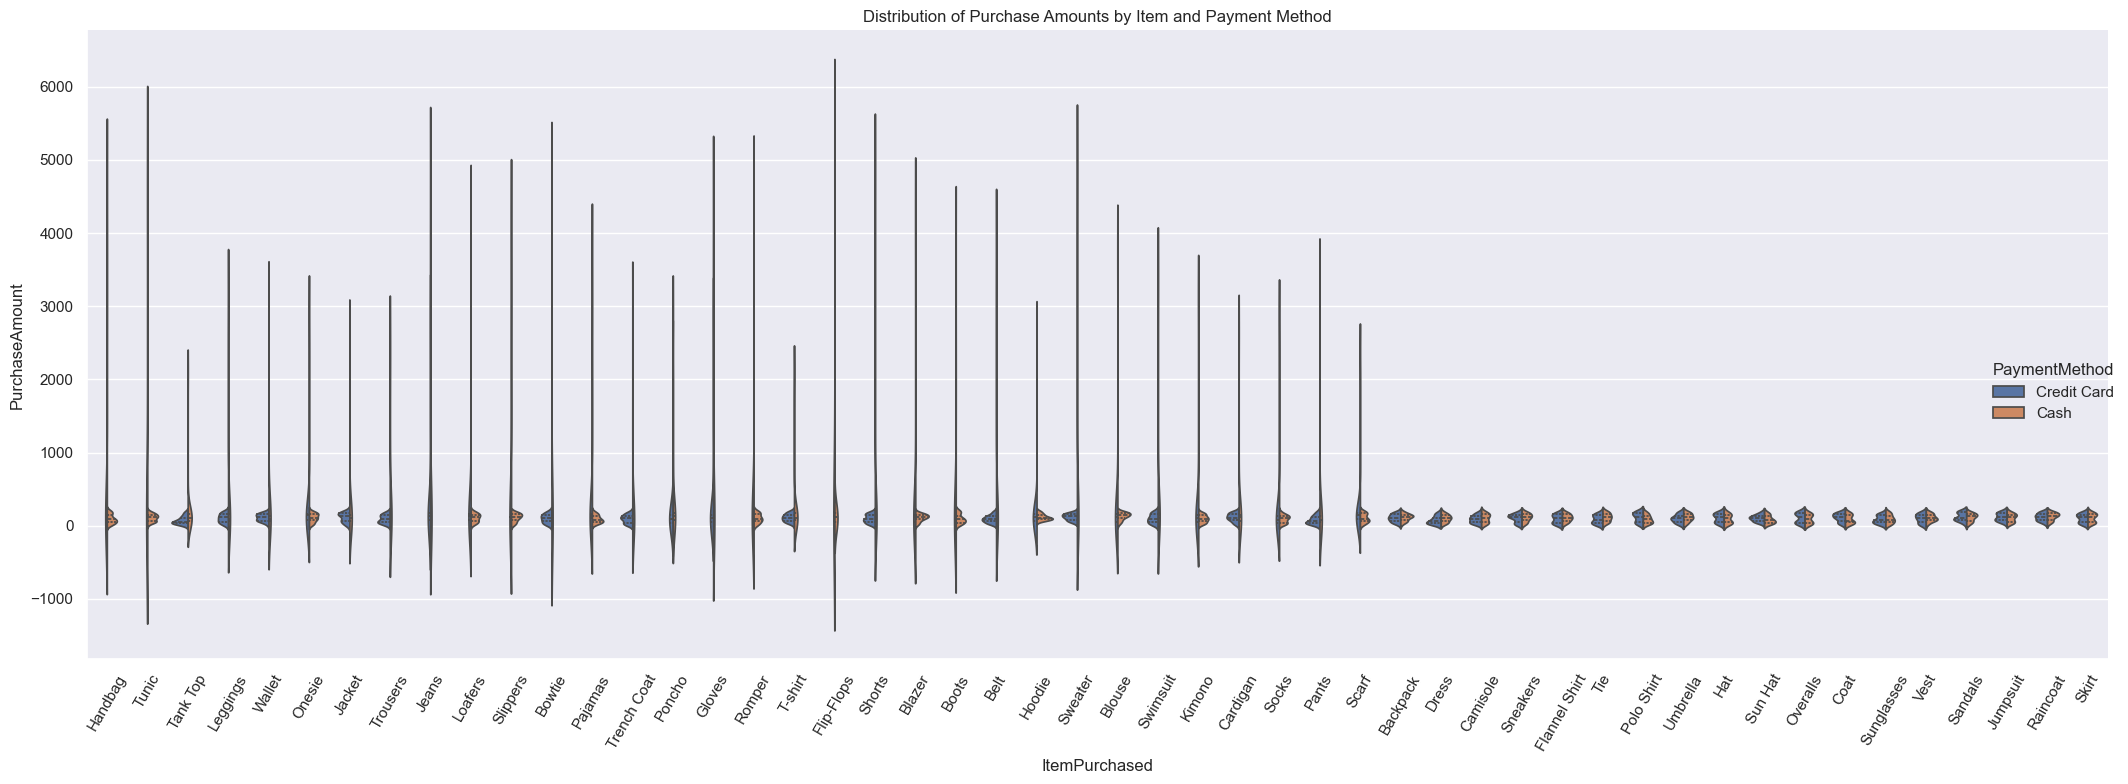

In [67]:
# Further analysis for reference later
plt.figure(figsize=(15,5))
sns.catplot(
    data=df,
    kind="violin",
    x="ItemPurchased",
    y="PurchaseAmount",
    hue="PaymentMethod",
    split=True,         
    inner="quart",     
    height=8,     
    aspect=2.5
)


plt.title("Distribution of Purchase Amounts by Item and Payment Method")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

#### Data Engineering (#1)
- clear na from df
- clean up the outliers on `PurchaseAmount`
- create report

In [68]:
cleaned_df = df.copy()
# data removal
cleaned_df.dropna(subset=["PurchaseAmount", "ReviewRating"], inplace=True)

# removing outliers
# 0.98 is 199, i added 11 more for more window
cleaned_df = cleaned_df[(cleaned_df['PurchaseAmount'] < 210) & (cleaned_df['PurchaseAmount'] > 0)]

In [69]:
cleaned_profile = ProfileReport(
    cleaned_df, 
    
    title='Fashion Retail Sales Profile',
    type_schema={
        'CustomerId': 'categorical'
    }
)
cleaned_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 286.04it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Keynotes**:
- `PurchaseAmount` is fairly distributed when extreme values are removed
- Huge chunk of data was removed (from 3400 to 2453, that's 27%)
- Correlation didn't change much for the three features mentioned in previous analysis

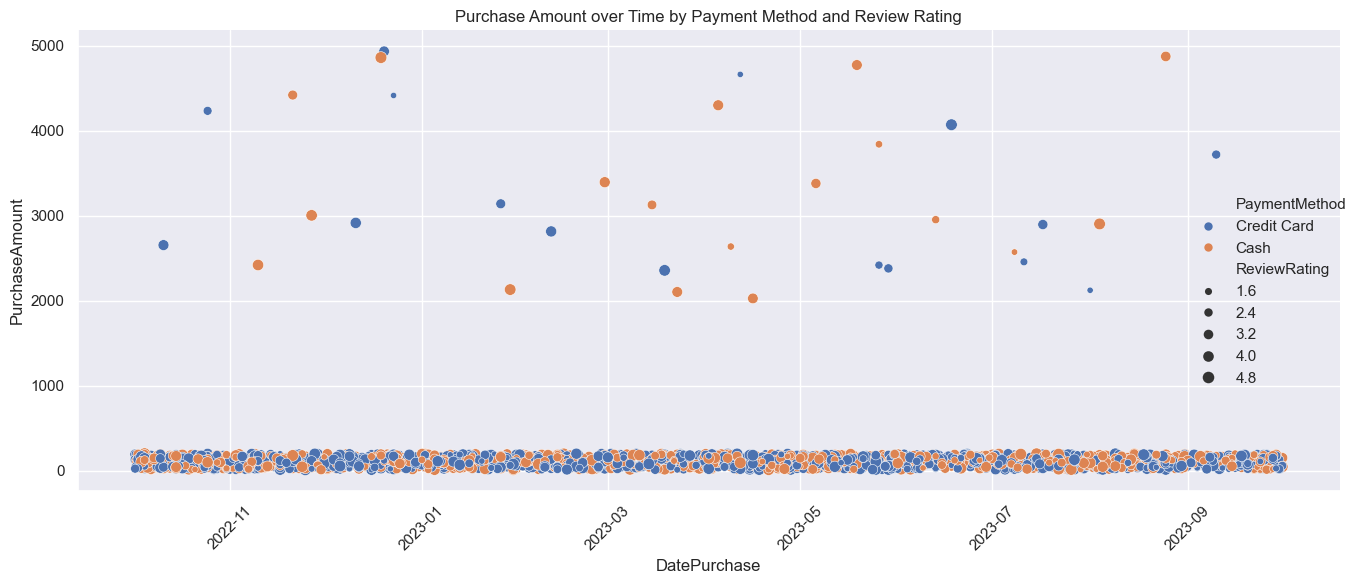

In [70]:
# scatter plot of original dataset with extreme values
sns.relplot(
    data=df,
    x = 'DatePurchase',
    y = 'PurchaseAmount',
    hue = 'PaymentMethod',
    size = 'ReviewRating',
    kind = 'scatter',
    height = 6,
    aspect = 2
)

plt.title('Purchase Amount over Time by Payment Method and Review Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

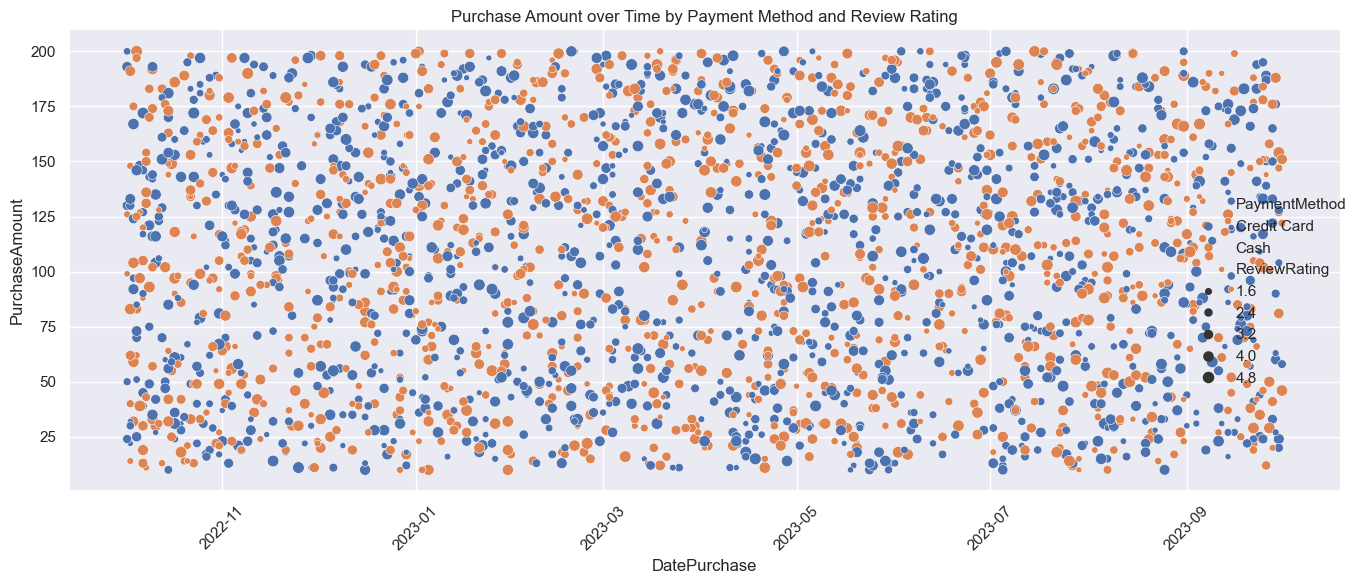

In [71]:
# scatter plot of original dataset with extreme values
sns.relplot(
    data=cleaned_df,
    x = 'DatePurchase',
    y = 'PurchaseAmount',
    hue = 'PaymentMethod',
    size = 'ReviewRating',
    kind = 'scatter',
    height = 6,
    aspect = 2
)

plt.title('Purchase Amount over Time by Payment Method and Review Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Keynotes**:
- Hard to determine, data seems way too scattered
- Amount of transactions in extreme values seems to be more on cash but they are approximately equal

#### Data Engineering (#2)
- fill na with median in distributions under each `ItemPurchase`
- clean up the outliers on `PurchaseAmount`
- create report

In [72]:
poc_df = df.copy()
aggre_df = df.copy().dropna()
aggre_df = aggre_df[['ItemPurchased', 'PurchaseAmount', 'ReviewRating']]

# prepare lookup table for median per item
lookup_df = aggre_df.groupby('ItemPurchased').agg({
    'PurchaseAmount': 'median',
    'ReviewRating': 'mean'
}).reset_index()

lookup_purchase = dict(zip(lookup_df['ItemPurchased'], lookup_df['PurchaseAmount']))
lookup_rating = dict(zip(lookup_df['ItemPurchased'], lookup_df['ReviewRating']))

# #  data imputation
poc_df['PurchaseAmount'] = poc_df['PurchaseAmount'].fillna(poc_df['ItemPurchased'].map(lookup_purchase))
poc_df['ReviewRating'] = poc_df['ReviewRating'].fillna(poc_df['ItemPurchased'].map(lookup_rating))

# # data cleanup
poc_df = poc_df[(poc_df['PurchaseAmount'] < 210) & (poc_df['PurchaseAmount'] > 0)]

In [73]:
poc_profile = ProfileReport(
    poc_df, 
    title='Fashion Retail Sales Profile',
    type_schema={
        'CustomerId': 'categorical'
    }
)
poc_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 1087.50it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

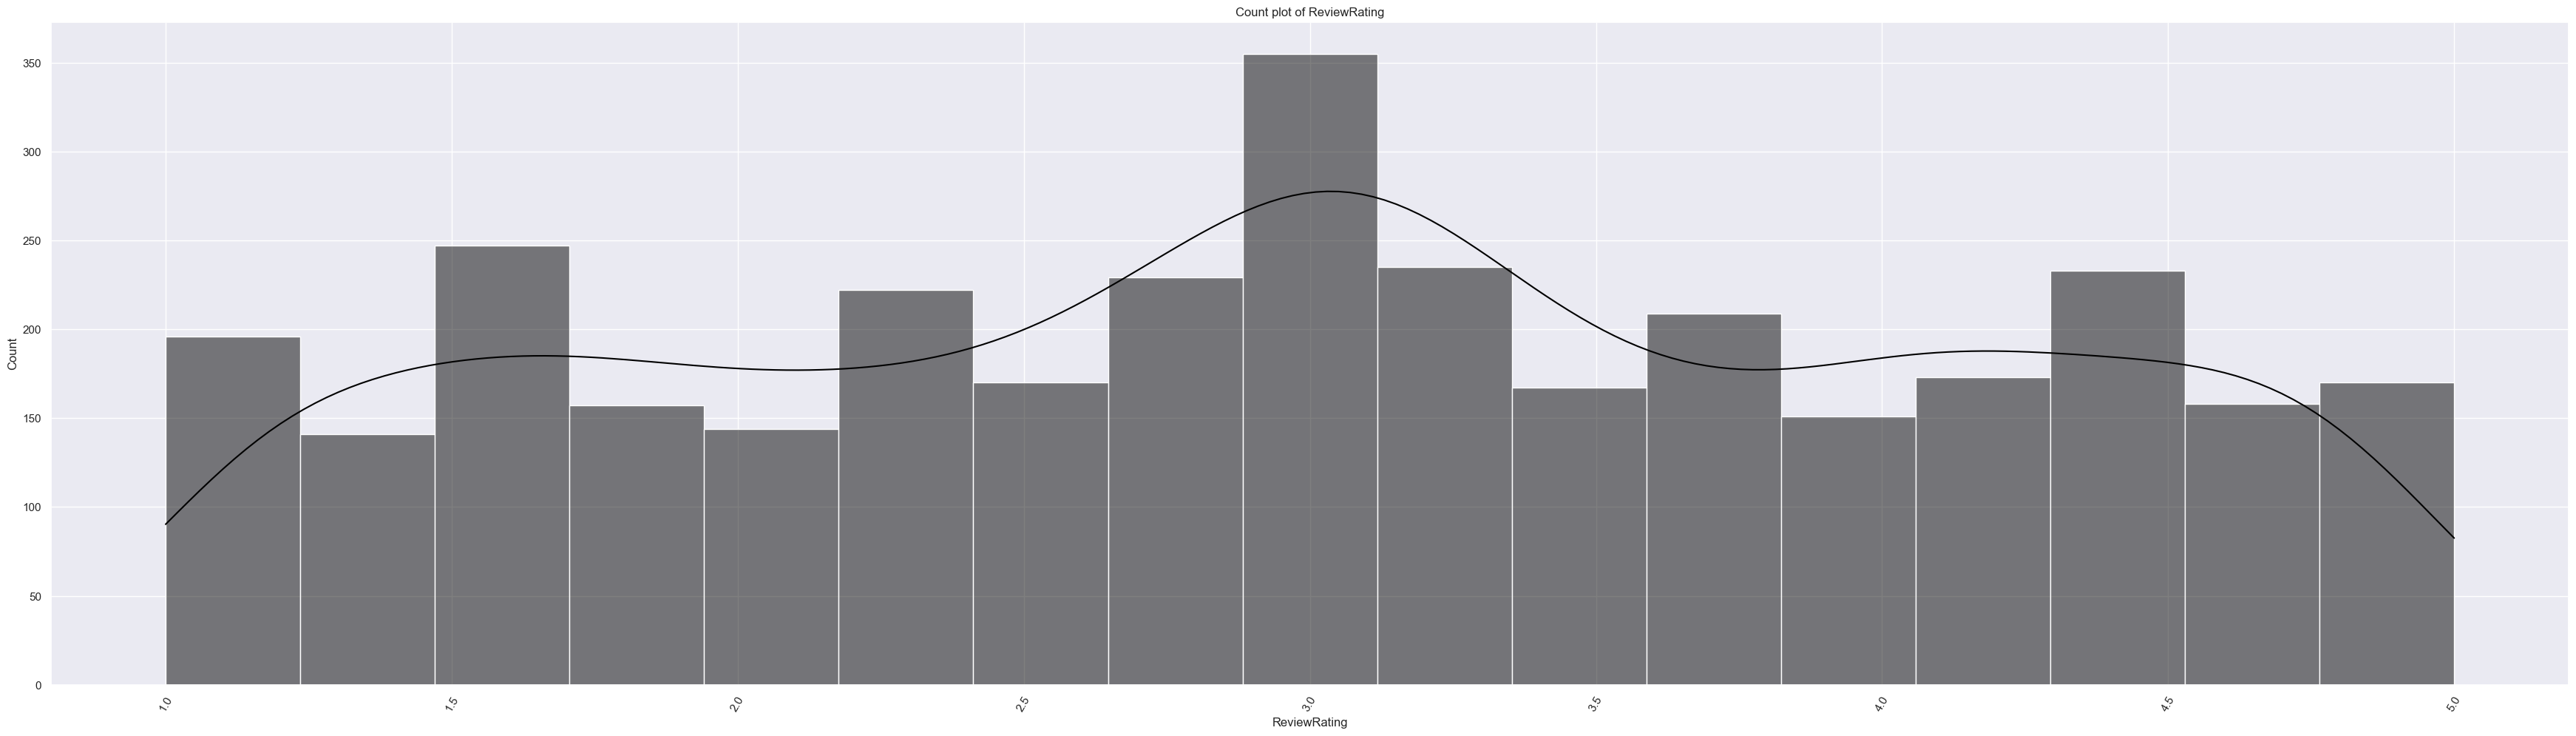

In [74]:
# close up graph on `ReviewRating` historgram in poc_df
plt.figure(figsize=(35, 10))
sns.histplot(poc_df['ReviewRating'], color='black', kde=True)
plt.title('Count plot of ReviewRating')
plt.xlabel('ReviewRating')
plt.ylabel("Count")
plt.tight_layout()
plt.xticks(rotation=60)
plt.show()

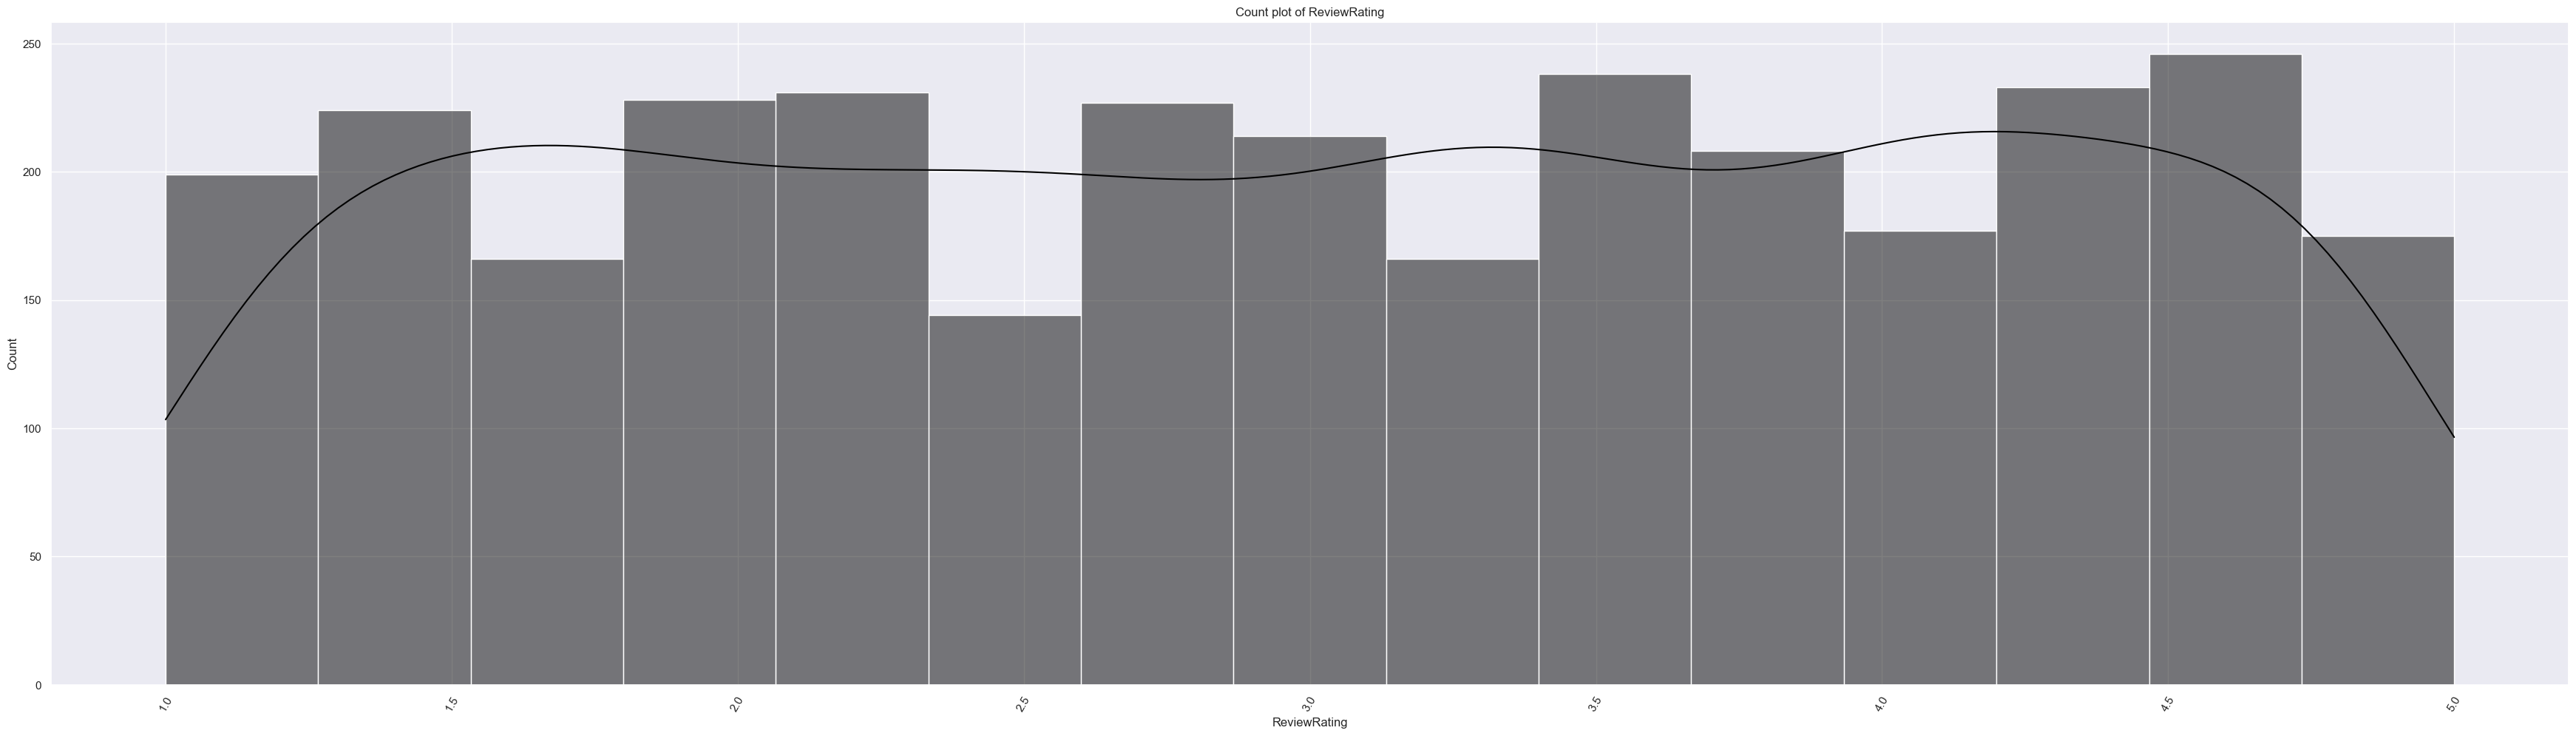

In [75]:
# close up graph on `ReviewRating` historgram in df
plt.figure(figsize=(35, 10))
sns.histplot(df['ReviewRating'], color='black', kde=True)
plt.title('Count plot of ReviewRating')
plt.xlabel('ReviewRating')
plt.ylabel("Count")
plt.tight_layout()
plt.xticks(rotation=60)
plt.show()

**Keynotes**:
- We have more data: 3357 vs 2400
- since there were 19% of missing values for `PurchaseAmount`
  - the distribution have changed, having more value in the middle
- spread of interactions between `PurchaseAmount` and `ReviewRating` is closer to `cleaned_df`
  - though, it has more distribution over the middle (this is because we used median)
  - the record with median `PurchaseAmount` happened to have more 3 ratings?

#### Data Engineering (#3)
- follow engineering as (#2)
- scale `PurchaseAmount` log based
- scale `ReviewRating` MinMax
- no cleanup
- create report

In [76]:
scale_df = df.copy()
aggre_df = df.copy().dropna()
aggre_df = aggre_df[['ItemPurchased', 'PurchaseAmount', 'ReviewRating']]

# prepare lookup table for median per item
lookup_df = aggre_df.groupby('ItemPurchased').agg({
    'PurchaseAmount': 'median',
    'ReviewRating': 'mean'
}).reset_index()

lookup_purchase = dict(zip(lookup_df['ItemPurchased'], lookup_df['PurchaseAmount']))
lookup_rating = dict(zip(lookup_df['ItemPurchased'], lookup_df['ReviewRating']))

# #  data imputation
scale_df['PurchaseAmount'] = scale_df['PurchaseAmount'].fillna(scale_df['ItemPurchased'].map(lookup_purchase))
scale_df['ReviewRating'] = scale_df['ReviewRating'].fillna(scale_df['ItemPurchased'].map(lookup_rating))

# # scaling
scaler = PowerTransformer(method='yeo-johnson')
scaled_array = scaler.fit_transform(scale_df[['PurchaseAmount', 'ReviewRating']])

scale_df[['PurchaseAmount', 'ReviewRating']] = scaled_array

In [77]:
scale_profile = ProfileReport(
    scale_df, 
    title='Fashion Retail Sales Profile',
    type_schema={
        'CustomerId': 'categorical'
    }
)
scale_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 919.47it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Key Notes**:
- notice how the scaled distribution of `PurchasedAmount` have a huge gap
  - right most values can be classified as extreme outliers
  - we can still try with this data

#### Ideas
Note: I am going through this selection blind, as i am not familiar with the models and techniques yet (will improve on this in the future). I am only focusing on the MLOps practice

base model idea = normalization (scaler) + model

- Idea 1: try with `clean_df` data
- Idea 2: try with `poc_df` data
- Idea 3: try with `poc_df` but no cleanup on extremes

Models:
 - "LogisticRegression"
 - "DecisionTree"
 - "RandomForest"
 - "GradientBoosting"
 - "AdaBoost"
 - "KNeighbors"
 - "SVC"
 - "XGBoost"

normalization:
    PowerTransformer(method='yeo-johnson') on numerical
    simple onehot on categorical or other simple tech

categorical to be used: ItemPurchase, PaymentMethod
numerical to be used: PurchaseAmount, DatePurchase

Predict: ReviewRating